**Importing the Modules**

In [2]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

**Reading CSV file for Correlation**

In [3]:
#importing the dataset as a dataframe
df = pd.read_csv("iris_flower.csv")

In [4]:
#displaying the dataframe
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#finding size of dataframe
df.shape

(150, 6)

In [6]:
#checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Renaming Columns name**

In [8]:
#renaming the columns for easier use
df.rename(columns={'SepalLengthCm': 'sepalLength', 'SepalWidthCm': 'sepalWidth', 'PetalLengthCm': 'petalLength', 'PetalWidthCm': 'petalWidth', 'Species': 'species'}, inplace=True)
df.rename(columns={'Id': 'id'}, inplace=True)

In [9]:
#removing the 'id' column as it is irrelevant
df = df.drop('id', axis=1)

In [10]:
#5-number summary
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Preprocessing #

In [11]:
#importing the necessary libraries for encoding, standardization and splitting the dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

**Enoding the Species column from object to int**

In [12]:
#encoding the categorical variable (species)
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

**Splitting data into features and target**

In [13]:
#splitting the data into features and target
X = df.drop('species', axis=1)
y = df['species']

In [14]:
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Visualizing Heatmap**

In [15]:
correlation=df.corr()

<Axes: >

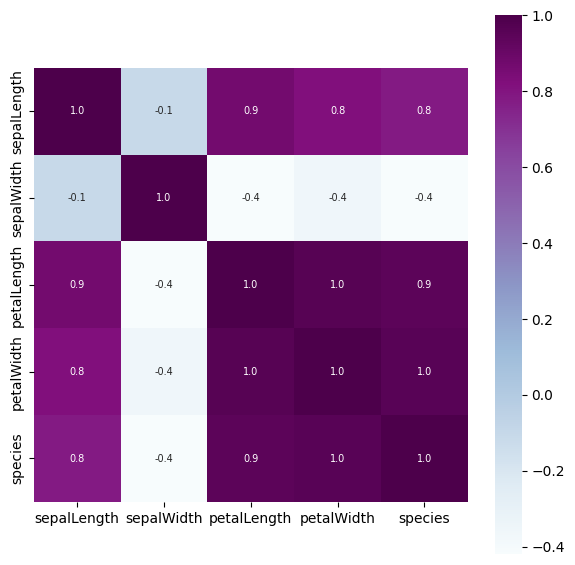

In [16]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,
             annot_kws={'size':7},cmap='BuPu')

**Graphical Representation of Average Features values**

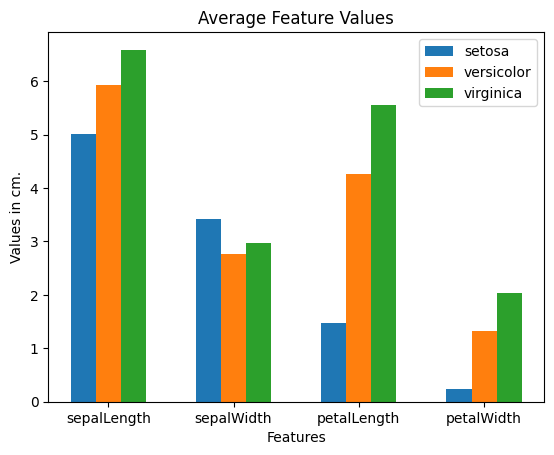

In [17]:
Xx = df[['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']].values
Yy = df['species'].values

unique_Y = np.unique(Yy)
num_features = X.shape[1]
Y_Data = np.zeros((num_features, len(unique_Y),), dtype='float32')

for j in unique_Y:
    for i in range(num_features):
        Y_Data[i, j] = np.mean(Xx[:, i][Yy == j].astype('float32'))

# Transpose the data for plotting
Y_Data_reshaped = Y_Data.T

# Define the feature labels
feature_labels = ["sepalLength", "sepalWidth", "petalLength", "petalWidth"]

# Create a bar plot
x = np.arange(len(feature_labels))
width = 0.2

# Custom class labels
class_labels = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

for i in range(len(unique_Y)):
    plt.bar(x + i * width, Y_Data_reshaped[i], width, label=f'{class_labels[unique_Y[i]]}')

plt.xlabel('Features')
plt.ylabel('Values in cm.')
plt.title('Average Feature Values')
plt.xticks(x + width, feature_labels)
plt.legend()
plt.show()


**Reading CSV file for trianing the models**

In [18]:
df = pd.read_csv("iris_flower.csv")

In [19]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Splitting the data into training and testing**

In [20]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

In [21]:
#scaling the numeric variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying ML models #

**Logistics Regression model**

In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(solver='newton-cg')

In [23]:
lr_model.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [24]:
lr_model.score(X_test,y_test)

0.9333333333333333

In [25]:
y_lr_pred=lr_model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_lr_pred))

[[ 8  0  0]
 [ 0  9  1]
 [ 0  1 11]]


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

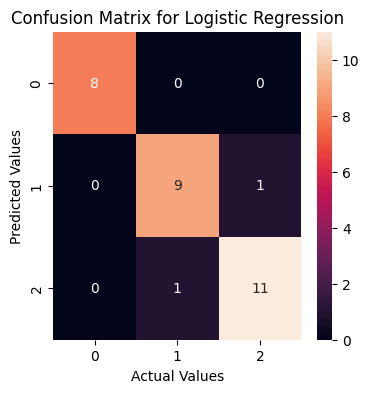

In [28]:
plt.figure(figsize=(4,4))
#plt.subplot(2,2,1)
sns.heatmap(confusion_matrix(y_test,y_lr_pred),annot=True)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')

**KNN model**

In [29]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)

In [30]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [31]:
knn.score(X_test,y_test)

0.9333333333333333

In [32]:
y_pred = knn.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 8  0  0]
 [ 0  9  1]
 [ 0  1 11]]


Text(0.5, 1.0, 'Confusion Matrix for KNN')

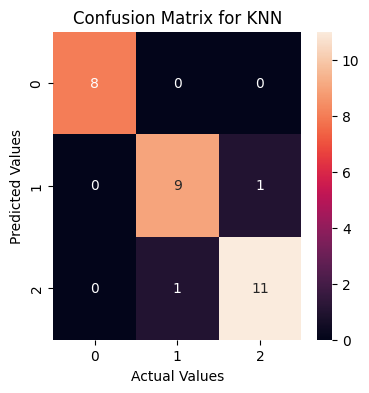

In [35]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for KNN')

**SVM model**

In [36]:
#SVM
from sklearn.svm import SVC
sv_m = SVC()

In [37]:
sv_m.fit(X_train, y_train)

SVC()

In [38]:
sv_m.score(X_test,y_test)

0.9333333333333333

In [39]:
sv = sv_m.predict(X_test)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,sv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,sv))

[[ 8  0  0]
 [ 0  9  1]
 [ 0  1 11]]


Text(0.5, 1.0, 'Confusion Matrix for SVM')

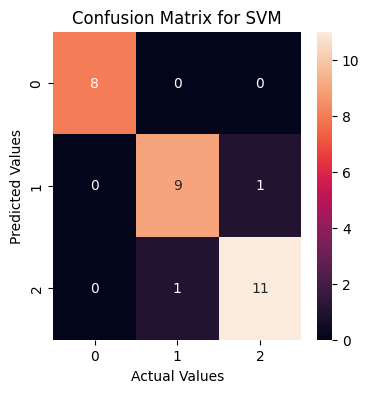

In [42]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,sv),annot=True)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for SVM')

**Naive Bayes Classifier model**

In [43]:
#Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()

In [44]:
nbc.fit(X_train, y_train)

GaussianNB()

In [45]:
nbc.score(X_test,y_test)

0.9666666666666667

In [46]:
nb = nbc.predict(X_test)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [48]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,nb))

[[ 8  0  0]
 [ 0 10  0]
 [ 0  1 11]]


Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes')

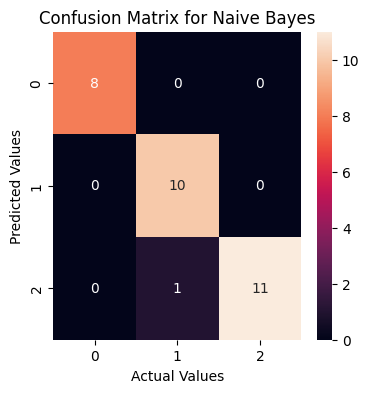

In [49]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,nb),annot=True)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Naive Bayes')

**Random Forest Classifier model**

In [50]:
#Random Fores Classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [51]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
#Accuracy score on test data
from sklearn.metrics import accuracy_score
X_test_prediction=model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,y_test)

In [53]:
print("Accuracy:",test_data_accuracy)

Accuracy: 0.9333333333333333


In [54]:
print(classification_report(y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,X_test_prediction))

[[ 8  0  0]
 [ 0  9  1]
 [ 0  1 11]]


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

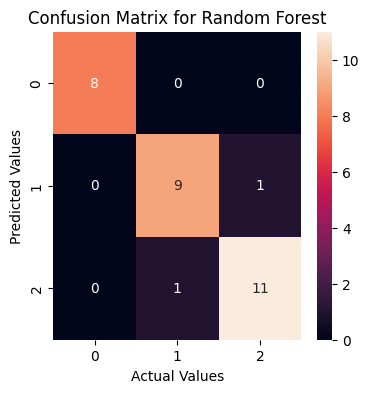

In [56]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,X_test_prediction),annot=True)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Random Forest')

**Model Accuracy Comparison**

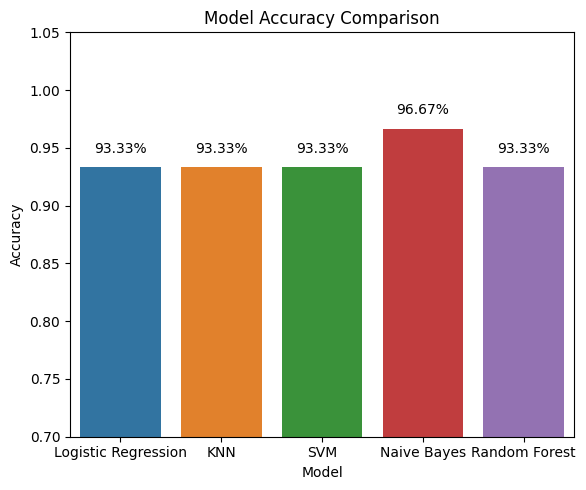

In [57]:
#model accuracy comparison
from sklearn.metrics import accuracy_score
models = ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Random Forest']
accuracy = [accuracy_score(y_test, y_lr_pred), accuracy_score(y_test, y_pred), accuracy_score(y_test,sv), accuracy_score(y_test,nb), accuracy_score(y_test,X_test_prediction)]

plt.figure(figsize=(6, 5))
ax = sns.barplot(x=models, y=accuracy)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.05)

# Add percentage values on top of bars
for i, acc in enumerate(accuracy):
    ax.text(i, acc + 0.01, f'{acc:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# GUI for Predicting the possibilities of iris classification #

In [58]:
import tkinter as tk
from tkinter import ttk
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from PIL import Image, ImageTk
import cv2

df = pd.read_csv('iris_flower.csv')

# Separating Features and target variable
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Creating a KNeighborsClassifier
nbc = GaussianNB()
nbc.fit(X, y)

# Adding image paths for each species
image_paths = {
    'Iris-setosa': 'setosa.png',
    'Iris-versicolor': 'versicolor.png',
    'Iris-virginica': 'virginica.png'
}

# Creating the main application window
root = tk.Tk()
root.title("Iris Species Prediction")

# Setting background color
root.configure(bg='#f0f0f0')

# Creating Widgets for user input
sepal_length_label = ttk.Label(root, text="Sepal Length (cm):", background='#f0f0f0', font=("Arial", 12))
sepal_length_label.pack(pady=5)
sepal_length_var = tk.StringVar()
sepal_length_entry = ttk.Entry(root, textvariable=sepal_length_var, font=("Arial", 12))
sepal_length_entry.pack(pady=5)

sepal_width_label = ttk.Label(root, text="Sepal Width (cm):", background='#f0f0f0', font=("Arial", 12))
sepal_width_label.pack(pady=5)
sepal_width_var = tk.StringVar()
sepal_width_entry = ttk.Entry(root, textvariable=sepal_width_var, font=("Arial", 12))
sepal_width_entry.pack(pady=5)

petal_length_label = ttk.Label(root, text="Petal Length (cm):", background='#f0f0f0', font=("Arial", 12))
petal_length_label.pack(pady=5)
petal_length_var = tk.StringVar()
petal_length_entry = ttk.Entry(root, textvariable=petal_length_var, font=("Arial", 12))
petal_length_entry.pack(pady=5)

petal_width_label = ttk.Label(root, text="Petal Width (cm):", background='#f0f0f0', font=("Arial", 12))
petal_width_label.pack(pady=5)
petal_width_var = tk.StringVar()
petal_width_entry = ttk.Entry(root, textvariable=petal_width_var, font=("Arial", 12))
petal_width_entry.pack(pady=5)

# Creating button to predict species with color
def predict_species():
    try:
        sepal_length = float(sepal_length_var.get())
        sepal_width = float(sepal_width_var.get())
        petal_length = float(petal_length_var.get())
        petal_width = float(petal_width_var.get())

        # Predicting the species probabilities
        species_probabilities = knn.predict_proba([[sepal_length, sepal_width, petal_length, petal_width]])[0]

        # Getting the species with the highest probability
        max_probability_index = species_probabilities.argmax()
        max_probability_species = df['Species'].unique()[max_probability_index]

        # Updating the result label with the species and its probability
        result_label.config(text=f"Predicted Species: {max_probability_species} "
                                 f"({species_probabilities[max_probability_index]*100:.2f}%)")

        # Updating the image
        update_image(max_probability_species)
    except ValueError:
        result_label.config(text="Please enter valid numeric values", foreground='red')

def update_image(species_key):
    # Getting the image path for the predicted species
    image_path = image_paths.get(species_key, 'default.jpg')
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (150, 150))

    # Converting to ImageTk format
    photo = ImageTk.PhotoImage(image=Image.fromarray(image))

    # Updating the image widget
    image_label.configure(image=photo)
    image_label.image = photo  

# Creating button to predict species with color
predict_button = ttk.Button(root, text="Check Iris Category", command=predict_species, style="TButton")
predict_button.pack(pady=10)

# Labelling to display the result
result_label = ttk.Label(root, text="Predicted Species:", background='#f0f0f0', font=("Arial", 14))
result_label.pack(pady=10)

# Adding image label
default_image = cv2.imread('default.jpg')
default_image = cv2.cvtColor(default_image, cv2.COLOR_BGR2RGB)
default_image = cv2.resize(default_image, (150, 150))
default_photo = ImageTk.PhotoImage(image=Image.fromarray(default_image))

image_label = ttk.Label(root, image=default_photo)
image_label.image = default_photo  
image_label.configure(image=default_photo)
image_label.pack(pady=10)

# Styling for the button
style = ttk.Style()
style.configure("TButton", padding=10, relief="flat", background='#26C6DA', foreground='#000000', font=('Calibri', 12))
# Running the Tkinter event loop
root.mainloop()
